In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 보험 청구/지급 데이터 + 보험 사전 건강 검진 데이터 병합
# 보험 청구 지급 데이터에 있는 고객들의 정보이므로 사전 건강 검진에서 가입이 거절된 사람들은 포함되어 있지 않음. 
# 결론적으로 보험 가입이 되어 있는 사람들의 정보만 존재.
df = pd.read_excel("insu_request+review.xlsx")

In [3]:
df

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,...,new_bt_mch_judge,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49445,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49446,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49447,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 청구/지급 + 사전 정보 데이터에는 4546명의 사람 존재.
# 아이디 당 여러 건의 청구가 있기 때문에 데이터셋에 정확히 몇 명이 존재하는지 파악하기 위한 코드
a = df['customer_id']
a = list(set(a))
len(a)

4546

In [5]:
# 한 아이디별로 납입 데이터는 누적이므로, 가장 최근 납입이 총 납입액이라고 생각할 수 있음.
# 한 아이디별로 
# insu_cum_amount 는 max() / insu_req_amount 는 sum()
table = pd.pivot_table(df, index=['customer_id','insu_prod_name'],
                       values=['insu_cum_amount','insu_req_amount'],aggfunc=['max','sum'])
table

max                             sum  \
                           insu_cum_amount insu_req_amount insu_cum_amount   
customer_id insu_prod_name                                                   
C112379     가족 만족 보험 1             1800000          424498        17520000   
C112404     가족 만족 보험 1              600000          501230         1200000   
C112411     가족 만족 보험 1              240000          333680          240000   
C112570     통합보험 +1                4875000         2350069         5250000   
C112727     통합보험 +1                3250000          201880         3250000   
...                                    ...             ...             ...   
C134197     건강보험                   4000000         1140048        34900000   
C134221     건강보험                   3600000         1616283        20400000   
C134227     건강보험                   1100000          131077         5000000   
C134250     건강 보살핌                 1650000         2716990        12600000   
C134251     울라트 보험                 2640000          111570         2640000   

                                            
                           insu_req_amount  
customer_id insu_prod_name                  
C112379     가족 만족 보험 1              623098  
C112404     가족 만족 보험 1              808750  
C112411     가족 만족 보험 1              333680  
C112570     통합보험 +1                2762279  
C112727     통합보험 +1                 201880  
...                                    ...  
C134197     건강보험                   1891048  
C134221     건강보험                   6281720  
C134227     건강보험                    262028  
C134250     건강 보살핌                 3367672  
C134251     울라트 보험                  111570  

[5354 rows x 4 columns]

In [7]:
# 사람별 / 보험별 수익
sub = table['max']['insu_cum_amount']-table['sum']['insu_req_amount']
sub = sub.to_frame()
sub = sub.rename({0:'profit'},axis='columns')
sub = sub.reset_index()
sub
# no = pd.DataFrame(sub['customer_id'].value_counts())

,customer_id,insu_prod_name,profit
0,C112379,가족 만족 보험 1,1176902
1,C112404,가족 만족 보험 1,-208750
2,C112411,가족 만족 보험 1,-93680
3,C112570,통합보험 +1,2112721
4,C112727,통합보험 +1,3048120
...,...,...,...
5349,C134197,건강보험,2108952
5350,C134221,건강보험,-2681720
5351,C134227,건강보험,837972
5352,C134250,건강 보살핌,-1717672


In [8]:
# 사람별 수익성
sub_hap = sub.groupby(['customer_id']).sum()
sub_hap = sub_hap.reset_index()
sub_hap

,customer_id,profit
0,C112379,1176902
1,C112404,-208750
2,C112411,-93680
3,C112570,2112721
4,C112727,3048120
...,...,...
4541,C134197,2108952
4542,C134221,-2681720
4543,C134227,837972
4544,C134250,-1717672


In [9]:
sub_hap[sub_hap['profit']>0]

,customer_id,profit
0,C112379,1176902
3,C112570,2112721
4,C112727,3048120
5,C112730,1099094
6,C112742,108690
...,...,...
4538,C134184,11536840
4539,C134186,7610200
4541,C134197,2108952
4543,C134227,837972


In [10]:
sub_hap[sub_hap['profit']<0]

,customer_id,profit
1,C112404,-208750
2,C112411,-93680
11,C112881,-299736
13,C112911,-774133
20,C112941,-898703
...,...,...
4500,C133978,-972424
4523,C134107,-515322
4540,C134188,-1803139
4542,C134221,-2681720


In [11]:
sub_hap[sub_hap['profit']==0]

,customer_id,profit
54,C113107,0
748,C117045,0
3620,C129697,0
3691,C129961,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1ac165fb588>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac162478c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac15a6bb08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac1623bd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac1670ddc8>],
 'means': []}

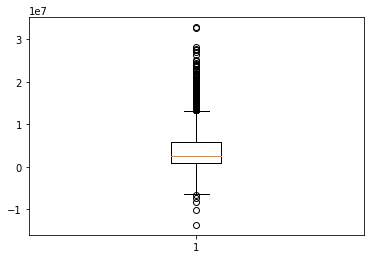

In [12]:
plt.boxplot(sub_hap['profit'])

In [13]:
# 수익 사분위수
print(sub_hap['profit'].quantile(0.25))
print(sub_hap['profit'].median())
print(sub_hap['profit'].quantile(0.75))

880244.75
2553396.0
5823341.5


In [14]:
# 납입 - 지급 < = 5만원
sub_hap[sub_hap['profit']<=50000]

,customer_id,profit
1,C112404,-208750
2,C112411,-93680
11,C112881,-299736
13,C112911,-774133
20,C112941,-898703
...,...,...
4500,C133978,-972424
4523,C134107,-515322
4540,C134188,-1803139
4542,C134221,-2681720


In [15]:
# 납입 - 지급 > 5 만원
sub_hap[sub_hap['profit']>50000]

,customer_id,profit
0,C112379,1176902
3,C112570,2112721
4,C112727,3048120
5,C112730,1099094
6,C112742,108690
...,...,...
4538,C134184,11536840
4539,C134186,7610200
4541,C134197,2108952
4543,C134227,837972


In [16]:
# 납입 - 지급 >= 5만원인 사람들 고위험군
high_risk_id = list(sub_hap[sub_hap['profit']<=50000]['customer_id'])
high_risk_id
# len(high_risk_id)

['C112404',
 'C112411',
 'C112881',
 'C112911',
 'C112941',
 'C112953',
 'C112998',
 'C113013',
 'C113014',
 'C113037',
 'C113099',
 'C113102',
 'C113107',
 'C113170',
 'C113176',
 'C113210',
 'C113211',
 'C113224',
 'C113252',
 'C113284',
 'C113352',
 'C113371',
 'C113395',
 'C113402',
 'C113420',
 'C113455',
 'C113515',
 'C113544',
 'C113553',
 'C113574',
 'C113581',
 'C113587',
 'C113639',
 'C113691',
 'C113720',
 'C113788',
 'C113801',
 'C113858',
 'C113884',
 'C113901',
 'C113923',
 'C113938',
 'C114024',
 'C114083',
 'C114167',
 'C114410',
 'C114440',
 'C114495',
 'C114555',
 'C114595',
 'C114611',
 'C114658',
 'C114678',
 'C114742',
 'C114808',
 'C114830',
 'C115029',
 'C115030',
 'C115066',
 'C115138',
 'C115179',
 'C115270',
 'C115369',
 'C115413',
 'C115431',
 'C115432',
 'C115470',
 'C115621',
 'C115669',
 'C115778',
 'C115790',
 'C115793',
 'C115914',
 'C115919',
 'C116050',
 'C116051',
 'C116200',
 'C116257',
 'C116413',
 'C116464',
 'C116470',
 'C116481',
 'C116498',
 'C1

In [17]:
# 납입 - 지급 < 5만원인 사람들 저위험군
low_risk_id = list(sub_hap[sub_hap['profit']>50000]['customer_id'])
low_risk_id
# len(low_risk_id)

['C112379',
 'C112570',
 'C112727',
 'C112730',
 'C112742',
 'C112759',
 'C112856',
 'C112875',
 'C112878',
 'C112899',
 'C112915',
 'C112925',
 'C112928',
 'C112929',
 'C112935',
 'C112937',
 'C112959',
 'C112963',
 'C112966',
 'C112972',
 'C112986',
 'C112987',
 'C112988',
 'C112989',
 'C113001',
 'C113007',
 'C113016',
 'C113018',
 'C113024',
 'C113025',
 'C113031',
 'C113033',
 'C113055',
 'C113058',
 'C113069',
 'C113076',
 'C113081',
 'C113082',
 'C113086',
 'C113088',
 'C113101',
 'C113105',
 'C113109',
 'C113112',
 'C113133',
 'C113135',
 'C113139',
 'C113149',
 'C113155',
 'C113162',
 'C113172',
 'C113175',
 'C113178',
 'C113190',
 'C113193',
 'C113196',
 'C113202',
 'C113214',
 'C113219',
 'C113222',
 'C113223',
 'C113225',
 'C113230',
 'C113231',
 'C113235',
 'C113261',
 'C113277',
 'C113295',
 'C113298',
 'C113303',
 'C113304',
 'C113305',
 'C113308',
 'C113310',
 'C113311',
 'C113314',
 'C113315',
 'C113330',
 'C113333',
 'C113334',
 'C113336',
 'C113343',
 'C113344',
 'C1

In [111]:
# Risk 붙일 데이터 프레임 생성
add_profit2 = pd.merge(sub_hap,df,how='left',on='customer_id')
add_profit2 = add_profit2.drop_duplicates(['customer_id'])
add_profit2 = add_profit2.reset_index(drop=True)

In [112]:
add_profit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 70 columns):
customer_id              4546 non-null object
profit                   4546 non-null int64
review_cat               4546 non-null object
judge                    4546 non-null object
gender                   4546 non-null int64
age                      4546 non-null int64
insu_id                  4546 non-null object
insu_contract_date       4546 non-null object
insu_prod_id             4546 non-null object
insu_prod_name           4546 non-null object
req_id                   4546 non-null object
req_id_seq               4546 non-null int64
sick_main                4546 non-null object
sick_1st                 4546 non-null object
sick_2nd                 947 non-null object
sick_3rd                 371 non-null object
dg_cat                   4546 non-null object
dg_start_date            4546 non-null object
dg_end_date              4546 non-null object
dg_duration              

In [113]:
add_profit2

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mch_judge,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge
0,C112379,1176902,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
1,C112404,-208750,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0
2,C112411,-93680,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112570,2112721,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C112727,3048120,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,C134197,2108952,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
4542,C134221,-2681720,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,C134227,837972,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
4544,C134250,-1717672,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
add_profit2['risk'] = np.where(add_profit2['profit'] >=50000, 0, 1)

In [115]:
add_profit2

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
0,C112379,1176902,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0
1,C112404,-208750,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1
2,C112411,-93680,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,C112570,2112721,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,C112727,3048120,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,C134197,2108952,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
4542,C134221,-2681720,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4543,C134227,837972,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0
4544,C134250,-1717672,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [65]:
add_profit2[add_profit2['risk']==1]

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
1,C112404,-208750,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1
2,C112411,-93680,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,C112881,-299736,혈액검사,재검,1,62,INS-17573,16-Feb-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,1
13,C112911,-774133,혈액검사,승인,1,60,INS-12978,07-Oct-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,1
20,C112941,-898703,혈액검사,재검,1,60,INS-13031,20-Oct-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,C133978,-972424,혈액검사,승인,2,55,INS-19281,05-Nov-14,PR-20569,조심조심 보험 4,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1
4523,C134107,-515322,일반검진,재검,2,55,INS-19472,11-Jul-15,PR-20569,조심조심 보험 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4540,C134188,-1803139,일반검진,승인,1,41,INS-20757,21-Jun-15,PR-20569,조심조심 보험 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4542,C134221,-2681720,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [66]:
add_profit2[add_profit2['risk']==0]

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
0,C112379,1176902,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0
3,C112570,2112721,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,C112727,3048120,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,C112730,1099094,일반검진,승인,1,65,INS-10221,31-Aug-15,PR-20804,건강보험 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,C112742,108690,일반검진,승인,1,65,INS-17737,01-Sep-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,C134184,11536840,혈액검사,승인,2,53,INS-16355,12-Aug-15,PR-20083,울라트 보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4539,C134186,7610200,일반검진,승인,2,38,INS-15032,11-May-15,PR-20083,울라트 보험,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4541,C134197,2108952,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
4543,C134227,837972,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0


In [273]:
add_profit2.to_excel('add_profit2.xlsx')

In [276]:
add_profit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 71 columns):
customer_id              4546 non-null object
profit                   4546 non-null int64
review_cat               4546 non-null object
judge                    4546 non-null object
gender                   4546 non-null int64
age                      4546 non-null int64
insu_id                  4546 non-null object
insu_contract_date       4546 non-null object
insu_prod_id             4546 non-null object
insu_prod_name           4546 non-null object
req_id                   4546 non-null object
req_id_seq               4546 non-null int64
sick_main                4546 non-null object
sick_1st                 4546 non-null object
sick_2nd                 947 non-null object
sick_3rd                 371 non-null object
dg_cat                   4546 non-null object
dg_start_date            4546 non-null object
dg_end_date              4546 non-null object
dg_duration              

In [67]:
# 데이터 구성
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 특성이 유사한 모델 선택, scaling 필요한 모델 제외
# DT, RF, GB, ANN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가 : F1 score, ROC curce, AUC
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import numpy as np

# 패키지 불러오기 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추정검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# 가설검정 및 통계 분석 패키지
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

In [69]:
# 데이터 분할
df_train, df_test = train_test_split(add_profit, test_size=0.3, random_state=1234)
print("Train data size:{}".format(df_train.shape))
print("Test data size:{}".format(df_test.shape))

Train data size:(3182, 71)
Test data size:(1364, 71)


In [71]:
add_profit

,customer_id,profit,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
0,C112379,1176902,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0
1,C112404,-208750,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1
2,C112411,-93680,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,C112570,2112721,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,C112727,3048120,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,C134197,2108952,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
4542,C134221,-2681720,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4543,C134227,837972,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0
4544,C134250,-1717672,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [95]:
# 모델 및 회귀계수 검토
log_model=Logit.from_formula("""risk~C(review_cat)+C(judge)+C(gender)+C(insu_prod_name)+age+insu_req_amount+insu_pay_amount+insu_duration+insu_cum_amount+height+weight+bust+waist+bmi+whtr+bp_min+bp_max+pulse_count+C(new_bp_judge)""",df_train)
# 적합
log_result=log_model.fit()
# 결과 출력
print(log_result.summary())

         Current function value: 0.200124
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 3155
Model:                          Logit   Df Residuals:                     3116
Method:                           MLE   Df Model:                           38
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:                  0.3168
Time:                        19:34:44   Log-Likelihood:                -631.39
converged:                      False   LL-Null:                       -924.22
Covariance Type:            nonrobust   LLR p-value:                 2.800e-99
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -26.5595     18.399     -1.444      0.149     -62.620      

C:\Users\jykan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
y_pred=log_result.predict(df_test)
y_pred_class=(y_pred>0.5).astype(int)
y_pred_class.head()
# 실제 test 데이터의 목표변수의 test 데이터의 예측값 비교
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["risk"], y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["risk"], y_pred_class)))

Accuracy:0.918

Confusion Matrix:
[[1232    8]
 [ 104   20]]


C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from c

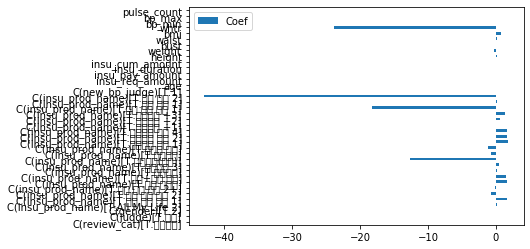

In [97]:
# 설명변수 중요도
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [99]:
# 결론 도출 - 표준화 회귀 계수
# 특정 변수 타입을 선택 / 제외하여 데이터 추출
df_char=add_profit.select_dtypes(include="object")
df_numeric=add_profit.select_dtypes(exclude="object")
# Data Scaling
scaler=StandardScaler()
np_numeric_scaled=scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)
# 문자 데이터 + 숫자 데이터
df_scaled=pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,profit,gender,age,req_id_seq,dg_duration,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount,height,...,sick_main,sick_1st,sick_2nd,sick_3rd,dg_cat,dg_start_date,dg_end_date,insu_pay_date,review_date,bt_hbsa
0,-0.599046,-1.240261,2.141076,-0.313283,4.559931,0.774795,0.109020,-0.411849,-0.341557,-0.445340,...,S02,S02,NaN,NaN,외래,24-Oct-15,16-Nov-15,18-Nov-15,2014-12-09,NEGATIVE
1,-0.924593,-1.240261,2.141076,0.183122,-0.236331,0.466919,0.224104,-0.968739,-0.679919,1.505311,...,S33,S33,NaN,NaN,입원,13-Aug-15,13-Aug-15,30-Aug-15,2015-03-29,NEGATIVE
2,-0.897558,-1.240261,2.141076,-0.313283,0.389268,0.535770,0.039861,-1.247184,-0.849100,0.204877,...,S33,S335,NaN,NaN,입원,09-Nov-15,12-Nov-15,16-Nov-15,2015-09-20,NaN
3,-0.379183,-1.240261,1.939889,-0.313283,5.602597,0.742454,-0.017415,-1.154369,-0.785657,0.204877,...,S83,S83,NaN,NaN,외래,27-Jun-15,25-Jul-15,01-Aug-15,2015-05-27,NaN
4,-0.159419,-1.240261,1.738702,-0.313283,0.180735,0.188883,-0.102571,0.980377,0.565442,-0.445340,...,S13,S13,NaN,NaN,외래,10-Aug-17,12-Aug-17,16-Aug-17,2015-06-24,NaN


In [100]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model=Logit.from_formula("""risk~C(review_cat)+C(judge)+C(gender)+C(insu_prod_name)+age+insu_req_amount+insu_pay_amount+insu_duration+insu_cum_amount+height+weight+bust+waist+bmi+whtr+bp_min+bp_max+pulse_count+C(new_bp_judge)""", df_train)
# 적합
scaled_log_result=scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

         Current function value: 0.200124
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 3155
Model:                          Logit   Df Residuals:                     3116
Method:                           MLE   Df Model:                           38
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:                  0.3168
Time:                        19:39:04   Log-Likelihood:                -631.39
converged:                      False   LL-Null:                       -924.22
Covariance Type:            nonrobust   LLR p-value:                 2.800e-99
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -26.5595     18.399     -1.444      0.149     -62.620      

C:\Users\jykan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from c

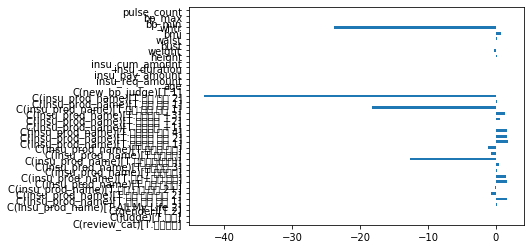

In [101]:
# 설명변수 중요도
df_log_scaled_coef=pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, 
                                index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

## 의사결정나무

In [223]:
df_end = add_profit.drop(['customer_id','insu_id','insu_contract_date','insu_prod_id',
                             'req_id','req_id_seq','sick_1st',
                             'sick_2nd','sick_3rd','dg_cat','dg_start_date','dg_end_date',
                             'insu_pay_date','review_date','bt_chol','bt_crea',
                         'bt_gluc','bt_hb','bt_hbsa','bt_hct','bt_mch','bt_mchc',
                         'bt_mvc','bt_plat','bt_rbc','bt_wbc',
                          'bt_rgpt','bt_sgot','bt_sgpt','bt_trig',
                          'new_bt_chol_judge','new_bt_crea_judge',
                          'new_bt_gluc_judge','new_bt_hb_judge',
                          'new_bt_hbsa_judge','new_bt_hct_judge',
                          'new_bt_mch_judge','new_bt_mchc_judge',
                          'new_bt_mvc_judge','new_bt_plat_judge',
                          'new_bt_rbc_judge','new_bt_wbc_judge','new_bt_rgpt_judge',
                          'new_bt_sgot_judge','new_bt_sgpt_judge','new_bt_trig_judge','profit',
                         'insu_pay_amount'],axis=1,inplace=False)

In [169]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 23 columns):
review_cat               4546 non-null object
judge                    4546 non-null object
gender                   4546 non-null int64
age                      4546 non-null int64
insu_prod_name           4546 non-null object
sick_main                4546 non-null object
dg_duration              4546 non-null int64
insu_req_amount          4546 non-null int64
insu_duration            4546 non-null int64
insu_cum_amount          4546 non-null int64
height                   4546 non-null int64
weight                   4546 non-null int64
bust                     4546 non-null int64
waist                    4546 non-null int64
bmi                      4546 non-null float64
whtr                     4546 non-null float64
bp_min                   4546 non-null int64
bp_max                   4546 non-null int64
pulse_count              4546 non-null int64
new_judge_score          4546 

In [170]:
pf_end = pd.get_dummies(df_end)
pf_end.head()
df_end = pf_end
df_end

,gender,age,dg_duration,insu_req_amount,insu_duration,insu_cum_amount,height,weight,bust,waist,...,sick_main_W45,sick_main_W54,sick_main_X23,sick_main_Z00,sick_main_Z01,sick_main_Z03,sick_main_Z04,sick_main_Z95,sick_main_Z98,sick_main_ZZZ
0,1,69,24,424498,11,1320000,160,59,84,72,...,0,0,0,0,0,0,0,0,0,0
1,1,69,1,307520,5,600000,175,79,101,92,...,0,0,0,0,0,0,0,0,0,0
2,1,69,4,333680,2,240000,165,70,92,88,...,0,0,0,0,0,0,0,0,0,0
3,1,67,29,412210,3,375000,165,75,95,89,...,0,0,0,0,0,0,0,0,0,0
4,1,65,3,201880,26,3250000,160,50,89,66,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,1,42,1,10000,25,2500000,178,70,95,86,...,0,0,0,0,0,0,0,0,0,0
4542,2,51,24,623700,1,100000,159,52,85,72,...,0,0,0,0,0,0,0,0,0,0
4543,2,45,1,42600,5,500000,153,45,88,74,...,0,0,0,0,0,0,0,0,0,0
4544,2,52,1,65200,7,350000,164,60,90,66,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_raw_y=df_end["risk"]
df_raw_x=df_end.drop("risk", axis=1, inplace=False)

In [172]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (1818, 393)
train data Y size : (1818,)
validation data X size : (1364, 393)
validation data Y size : (1364,)
test data X size : (1364, 393)
test data Y size : (1364,)


In [173]:
# 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Accuracy on training set:{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(tree_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.880


In [174]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidAccuracy"]=valid_accuracy

In [175]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.918,0.910
1,2,0.918,0.910
2,3,0.921,0.909
3,4,0.926,0.910
4,5,0.936,0.908
5,6,0.944,0.903
6,7,0.954,0.902
7,8,0.958,0.898
8,9,0.965,0.897
9,10,0.970,0.894


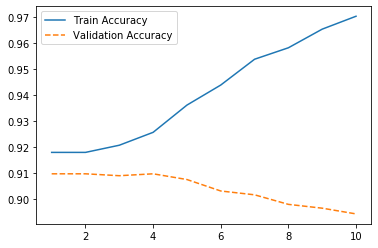

In [176]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [258]:
# 변수명 저장
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth=4,random_state=1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [259]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*2 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=valid_accuracy

In [260]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,2,0.921,0.909
1,4,0.921,0.909
2,6,0.921,0.909
3,8,0.921,0.909
4,10,0.921,0.909
5,12,0.921,0.909
6,14,0.921,0.909
7,16,0.921,0.909
8,18,0.921,0.909
9,20,0.921,0.909


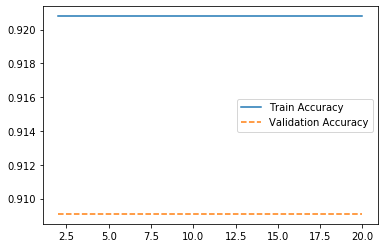

In [261]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [262]:
# 깊이가 4 모델
tree_low=DecisionTreeClassifier(max_depth=4, min_samples_split = 5, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [263]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf=[n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=10,
                                max_depth=3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_depth
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidAccuracy"]=valid_accuracy

In [264]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidAccuracy
0,1,0.920,0.909
1,2,0.919,0.909
2,3,0.919,0.909
3,4,0.919,0.909
4,5,0.919,0.909
5,6,0.918,0.910
6,7,0.918,0.910
7,8,0.918,0.910
8,9,0.918,0.910
9,10,0.918,0.910


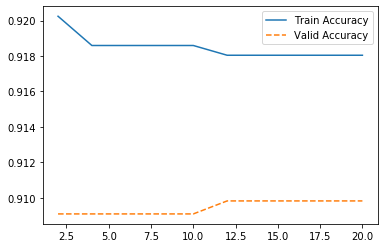

In [265]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.legend()

In [266]:
tree_final=DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=12, random_state=1234)
tree_final.fit(df_test_x, df_test_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [267]:
# 평가
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.909

Confusion matrix:
[[1240    0]
 [ 124    0]]


In [268]:
# 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_
# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,insu_cum_amount,0.532
3,insu_req_amount,0.468
0,gender,0.000
259,sick_main_N35,0.000
269,sick_main_N64,0.000
...,...,...
130,sick_main_I52,0.000
129,sick_main_I51,0.000
128,sick_main_I49,0.000
127,sick_main_I48,0.000


Text(0, 0.5, '설명변수')

C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from c

C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jykan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current fon

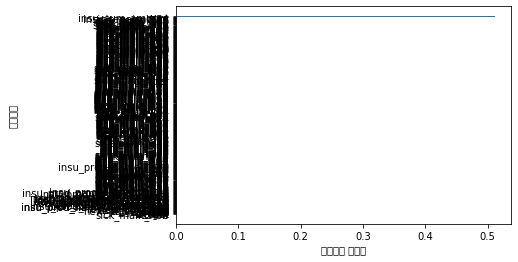

In [187]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [270]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator=DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid={"max_depth":para_depth, "min_samples_split":para_split,
           "min_samples_leaf":para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

best parameter:
{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score:
0.918


In [ ]:
"""risk~C(review_cat)+C(judge)+C(gender)+age+C(insu_prod_name)+C(sick_main)+insu_req_amount+insu_pay_amount+insu_duration+insu_cum_amount+height+weight+bust+waist+bmi+whtr+bp_min+bp_max+pulse_count+C(new_bp_judge)

## 다중회귀분석

- profit을 예측하는 설명변수 찾기

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [197]:
add_profit.corr().round(3)

,profit,gender,age,req_id_seq,dg_duration,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount,height,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
profit,1.000,0.124,-0.022,0.008,-0.073,-0.096,-0.045,0.106,0.541,-0.058,...,0.010,-0.007,0.010,-0.016,0.023,0.034,0.010,-0.007,-0.020,-0.358
gender,0.124,1.000,-0.022,-0.024,-0.015,0.001,-0.030,-0.047,0.020,-0.748,...,0.075,0.042,0.029,-0.087,-0.004,0.013,0.032,-0.176,-0.228,-0.024
age,-0.022,-0.022,1.000,0.089,0.057,0.048,-0.006,0.045,0.017,-0.213,...,-0.075,0.043,-0.009,-0.011,0.008,0.042,0.005,-0.023,0.117,0.086
req_id_seq,0.008,-0.024,0.089,1.000,-0.048,-0.055,0.024,0.047,0.061,-0.015,...,-0.042,-0.025,-0.005,-0.004,-0.019,0.031,0.001,0.013,0.025,0.037
dg_duration,-0.073,-0.015,0.057,-0.048,1.000,0.431,0.112,-0.037,-0.022,0.013,...,0.014,-0.008,-0.006,0.017,0.001,0.031,0.017,0.021,0.018,0.137
insu_req_amount,-0.096,0.001,0.048,-0.055,0.431,1.000,0.205,0.027,0.031,0.001,...,0.000,0.007,-0.007,0.012,0.004,0.008,0.005,0.012,0.002,0.212
insu_pay_amount,-0.045,-0.030,-0.006,0.024,0.112,0.205,1.000,0.053,0.041,0.037,...,0.004,0.047,-0.016,-0.005,-0.003,0.050,-0.002,-0.008,-0.004,0.096
insu_duration,0.106,-0.047,0.045,0.047,-0.037,0.027,0.053,1.000,0.634,0.017,...,-0.019,0.018,-0.041,-0.037,-0.001,-0.018,-0.004,-0.029,0.043,-0.129
insu_cum_amount,0.541,0.020,0.017,0.061,-0.022,0.031,0.041,0.634,1.000,-0.015,...,-0.002,-0.006,-0.020,-0.015,0.034,0.026,0.019,-0.013,0.059,-0.210
height,-0.058,-0.748,-0.213,-0.015,0.013,0.001,0.037,0.017,-0.015,1.000,...,-0.023,-0.036,-0.040,0.059,-0.015,-0.008,-0.027,0.135,0.153,-0.000


In [204]:
reg_model = ols(formula="profit~age+insu_req_amount+insu_pay_amount+insu_duration+insu_cum_amount+height+weight+bust+waist+bmi+whtr+bp_min+bp_max+pulse_count+bt_chol+bt_crea+bt_gluc+bt_hb+bt_hbsa+bt_hct+bt_mch+bt_mchc+bt_mvc+bt_plat+bt_rbc+bt_wbc+bt_rgpt+bt_sgot+bt_sgot+bt_sgpt+bt_trig+new_judge_score+new_bp_judge",data=add_profit)
reg_result= reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.64e-56
Time:                        22:16:14   Log-Likelihood:                -12248.
No. Observations:                 745   AIC:                         2.456e+04
Df Residuals:                     712   BIC:                         2.471e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.177e+07    

In [250]:
df_end = add_profit.drop(['customer_id','insu_id','insu_contract_date','insu_prod_id',
                             'req_id','req_id_seq','sick_1st',
                             'sick_2nd','sick_3rd','dg_cat','dg_start_date','dg_end_date',
                             'insu_pay_date','review_date','bt_chol','bt_crea',
                         'bt_gluc','bt_hb','bt_hbsa','bt_hct','bt_mch','bt_mchc',
                         'bt_mvc','bt_plat','bt_rbc','bt_wbc',
                          'bt_rgpt','bt_sgot','bt_sgpt','bt_trig',
                          'new_bt_chol_judge','new_bt_crea_judge',
                          'new_bt_gluc_judge','new_bt_hb_judge',
                          'new_bt_hbsa_judge','new_bt_hct_judge',
                          'new_bt_mch_judge','new_bt_mchc_judge',
                          'new_bt_mvc_judge','new_bt_plat_judge',
                          'new_bt_rbc_judge','new_bt_wbc_judge','new_bt_rgpt_judge',
                          'new_bt_sgot_judge','new_bt_sgpt_judge','new_bt_trig_judge',
                         'insu_pay_amount','gender'],axis=1,inplace=False)

In [251]:
df_raw_x=df_end.drop(['risk','review_cat','judge','insu_prod_name','sick_main','profit'],axis=1)
df_raw_x_const =sm.add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

C:\Users\jykan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
15,new_judge_score,1.040
17,new_pulse_count_judge,1.056
14,pulse_count,1.065
3,insu_req_amount,1.235
2,dg_duration,1.238
1,age,1.273
5,insu_cum_amount,1.683
4,insu_duration,1.688
16,new_bp_judge,2.168
12,bp_min,3.124


In [252]:
reg_model = ols(formula="profit~age+insu_req_amount+insu_pay_amount+insu_duration+insu_cum_amount+height+bust+bmi+bp_min+bp_max+pulse_count+bt_chol+bt_crea+bt_gluc+bt_hb+bt_hbsa+bt_hct+bt_mch+bt_mchc+bt_mvc+bt_plat+bt_rbc+bt_wbc+bt_rgpt+bt_sgot+bt_sgot+bt_sgpt+bt_trig+new_judge_score+new_bp_judge",data=add_profit)
reg_result= reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     15.04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           4.03e-56
Time:                        22:45:14   Log-Likelihood:                -12252.
No. Observations:                 745   AIC:                         2.456e+04
Df Residuals:                     715   BIC:                         2.470e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.338e+06    

In [253]:
df_raw_x=df_end.drop(['risk','review_cat','judge','insu_prod_name','sick_main','waist','whtr','weight','profit'],axis=1)
df_raw_x_const =sm.add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
12,new_judge_score,1.032
14,new_pulse_count_judge,1.054
11,pulse_count,1.063
1,age,1.211
3,insu_req_amount,1.235
2,dg_duration,1.237
6,height,1.532
5,insu_cum_amount,1.683
4,insu_duration,1.687
13,new_bp_judge,2.154


In [254]:
df_raw_y = df_end["profit"]
model=LinearRegression()
rfe=RFE(estimator=model,n_features_to_select=5).fit(df_raw_x,df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]
print("Selected Variables:{}".format(selected_cols))
print("Removed Varaibles:{}".format(removed_cols))

Selected Variables:Index(['dg_duration', 'insu_duration', 'new_judge_score', 'new_bp_judge',
       'new_pulse_count_judge'],
      dtype='object')
Removed Varaibles:Index(['age', 'insu_req_amount', 'insu_cum_amount', 'height', 'bust', 'bmi',
       'bp_min', 'bp_max', 'pulse_count'],
      dtype='object')


In [255]:
rfe_reg_model= ols(formula="profit~insu_duration+dg_duration+new_judge_score+new_bp_judge+new_pulse_count_judge",data=df_end)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     19.04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           8.60e-19
Time:                        22:45:43   Log-Likelihood:                -75793.
No. Observations:                4546   AIC:                         1.516e+05
Df Residuals:                    4540   BIC:                         1.516e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               3.32e+

In [199]:
bt_chol+bt_crea+bt_gluc+bt_hb+bt_hbsa+bt_hct+bt_mch+bt_mchc+bt_mvc+bt_plat+bt_rbc+bt_wbc+bt_rgpt+bt_sgot+bt_sgot+bt_sgpt+\
bt_trig+bt_new_judge_scrore+new_bp_judge

NameError: name 'bt_chol' is not defined